In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
import seaborn as sns

In [3]:
# TO PROCEED
# download data set https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633
# copy TWO_CENTURIES_OF_UM_RACES.csv and paste do data folder
df = pd.read_csv('data/TWO_CENTURIES_OF_UM_RACES.csv')

/var/folders/md/cg23_f211lbbqk8tc76zlt000000gn/T/ipykernel_10155/2789373578.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/TWO_CENTURIES_OF_UM_RACES.csv')


In [4]:
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [5]:
df.shape

(7461195, 13)

# Creation of subset of 50km/50mi marathons in USA in 2020

In [6]:
subset = df[(df['Event distance/length'].isin(['50km', '50mi'])) & (df['Year of event']==2020) & (df['Event name'].apply(lambda x: x[-5:]=='(USA)'))]

In [7]:
subset.shape

(26524, 13)

In [8]:
subset.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281


# Creation of a Athlete age column

In [9]:
subset['Athlete age'] = 2020 - subset['Athlete year of birth']

# Removing 'h' from a Athlete performance column

In [10]:
subset['Athlete performance'] = subset['Athlete performance'].apply(lambda x: x[:-2:])

In [11]:
subset['Athlete performance'].head()

2539945    3:17:55
2539946    4:02:32
2539947    4:07:57
2539948    4:22:02
2539949    4:27:34
Name: Athlete performance, dtype: object

# Creation of a Event country column

In [12]:
subset['Event country'] = subset['Event name'].apply(lambda x: x[-4:-1:])

In [13]:
subset['Event country'].head()

2539945    USA
2539946    USA
2539947    USA
2539948    USA
2539949    USA
Name: Event country, dtype: object

# Creation of a Event name column

In [14]:
subset['Event name'] = subset['Event name'].apply(lambda x: x[:-5:])

In [15]:
subset.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age,Event country
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0,USA
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0,USA
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0,USA
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0,USA
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0,USA


# Creation of a Event month column

In [16]:
subset['Event month'] = subset['Event dates'].apply(lambda x: int(x[-7:-5]))

In [17]:
subset.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Athlete age,Event country,Event month
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,29.0,USA,2
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,39.0,USA,2
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,21.0,USA,2
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,37.0,USA,2
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,43.0,USA,2


# Checking for the existence of a null value

In [18]:
subset.isna().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete club                 3130
Athlete country                 0
Athlete year of birth         235
Athlete gender                  0
Athlete age category          218
Athlete average speed           0
Athlete ID                      0
Athlete age                   235
Event country                   0
Event month                     0
dtype: int64

# Dropping Athlete club and Athlete age category

In [19]:
subset = subset.drop(['Athlete club', 'Athlete age category'], axis=1)

In [20]:
subset = subset.dropna()

# Checking for the existence of a duplicated values

In [21]:
subset.duplicated().sum()

0

# Resetting indices

In [22]:
subset = subset.reset_index(drop=True)

# Fixing types

In [23]:
subset['Athlete age'] = subset['Athlete age'].astype(int)

In [24]:
subset['Athlete average speed'] = subset['Athlete average speed'].astype(float)

# Renaming columns

In [25]:
subset = subset.rename(columns={
    'Year of event' : 'marathon_year',
    'Event dates' : 'marathon_day',
    'Event name' : 'marathon_name',
    'Event distance/length' : 'marathon_distance',
    'Event number of finishers' : 'marathon_number_of_finishers',
    'Athlete performance' : 'athlete_perfoemance',
    'Athlete country' : 'athlete_country',
    'Athlete year of birth' : 'athlete_year_of_birth',
    'Athlete gender' : 'athlete_gender',
    'Athlete average speed' : 'athlete_avg_speed',
    'Athlete ID' : 'athlete_id',
    'Athlete age' : 'athlete_age',
    'Event country' : 'marathon_country',
    'Event month' : 'marathon_month'
})

In [26]:
subset.columns

Index(['marathon_year', 'marathon_day', 'marathon_name', 'marathon_distance',
       'marathon_number_of_finishers', 'athlete_perfoemance',
       'athlete_country', 'athlete_year_of_birth', 'athlete_gender',
       'athlete_avg_speed', 'athlete_id', 'athlete_age', 'marathon_country',
       'marathon_month'],
      dtype='object')

# Reordering columns

In [27]:
usa_2020_marathons_50 = subset[['marathon_name', 'marathon_distance', 'marathon_year', 'marathon_month', 'marathon_day', 'marathon_country', 'marathon_number_of_finishers', 'athlete_id', 'athlete_country', 'athlete_age', 'athlete_gender', 'athlete_year_of_birth', 'athlete_avg_speed', 'athlete_perfoemance',]]


In [28]:
usa_2020_marathons_50.sort_index()

,marathon_name,marathon_distance,marathon_year,marathon_month,marathon_day,marathon_country,marathon_number_of_finishers,athlete_id,athlete_country,athlete_age,athlete_gender,athlete_year_of_birth,athlete_avg_speed,athlete_perfoemance
0,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,71287,USA,29,M,1991.0,15.158,3:17:55
1,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,629508,USA,39,M,1981.0,12.369,4:02:32
2,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,64838,USA,21,M,1999.0,12.099,4:07:57
3,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,704450,USA,37,M,1983.0,11.449,4:22:02
4,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,810281,USA,43,M,1977.0,11.212,4:27:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26284,Yankee Springs Fall Trail Run Festival,50km,2020,10,03.10.2020,USA,30,816361,USA,62,F,1958.0,7.013,7:07:48
26285,Yankee Springs Fall Trail Run Festival,50km,2020,10,03.10.2020,USA,30,326469,USA,43,F,1977.0,6.706,7:27:22
26286,Yankee Springs Fall Trail Run Festival,50km,2020,10,03.10.2020,USA,30,372174,USA,58,F,1962.0,6.705,7:27:24
26287,Yankee Springs Fall Trail Run Festival,50km,2020,10,03.10.2020,USA,30,860349,USA,39,F,1981.0,6.543,7:38:30


In [29]:
usa_2020_marathons_50.head()

,marathon_name,marathon_distance,marathon_year,marathon_month,marathon_day,marathon_country,marathon_number_of_finishers,athlete_id,athlete_country,athlete_age,athlete_gender,athlete_year_of_birth,athlete_avg_speed,athlete_perfoemance
0,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,71287,USA,29,M,1991.0,15.158,3:17:55
1,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,629508,USA,39,M,1981.0,12.369,4:02:32
2,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,64838,USA,21,M,1999.0,12.099,4:07:57
3,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,704450,USA,37,M,1983.0,11.449,4:22:02
4,West Seattle Beach Run - Winter Edition,50km,2020,2,02.02.2020,USA,20,810281,USA,43,M,1977.0,11.212,4:27:34


# Ratio of marathon distances

<Axes: xlabel='marathon_distance', ylabel='Count'>

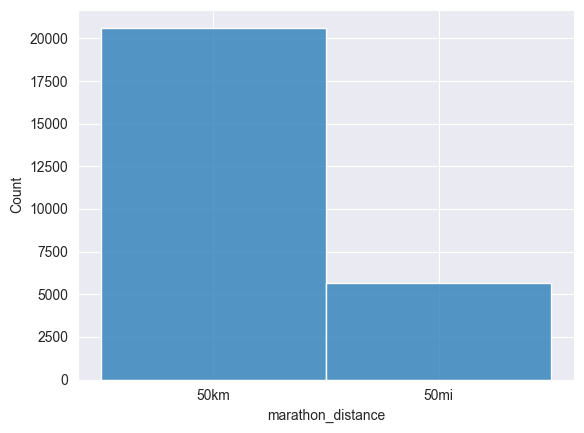

In [30]:
sns.set_style('darkgrid')
sns.histplot(usa_2020_marathons_50['marathon_distance'])

# Ratio of marathon distances by gender

<Axes: xlabel='marathon_distance', ylabel='Count'>

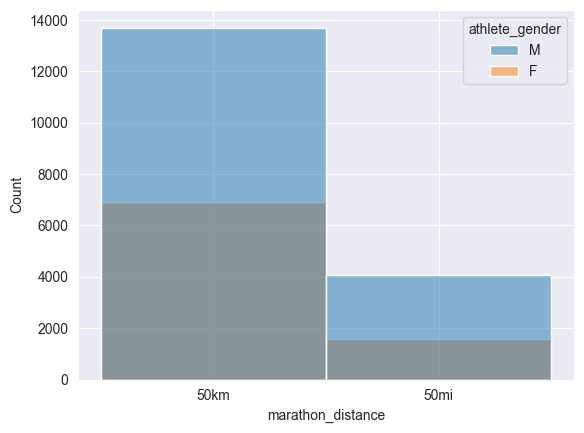

In [31]:
sns.histplot(usa_2020_marathons_50, x='marathon_distance', hue='athlete_gender')

In [32]:
usa_2020_marathons_50.groupby(['athlete_gender', 'marathon_distance'])['marathon_distance'].agg(['count'])

count
athlete_gender marathon_distance       
F              50km                6927
               50mi                1581
M              50km               13705
               50mi                4076

# Distribution of average speed of athletes at 50-mile marathons

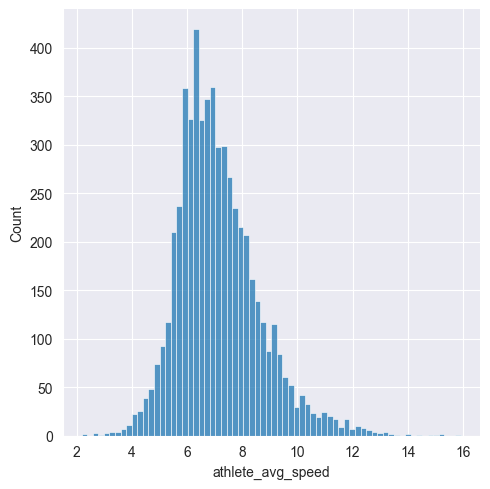

In [33]:
sns.displot(usa_2020_marathons_50[usa_2020_marathons_50['marathon_distance']=='50mi']['athlete_avg_speed'])

# Distribution of average speed of athletes in 50km/50mi marathons by gender

<Axes: xlabel='marathon_distance', ylabel='athlete_avg_speed'>

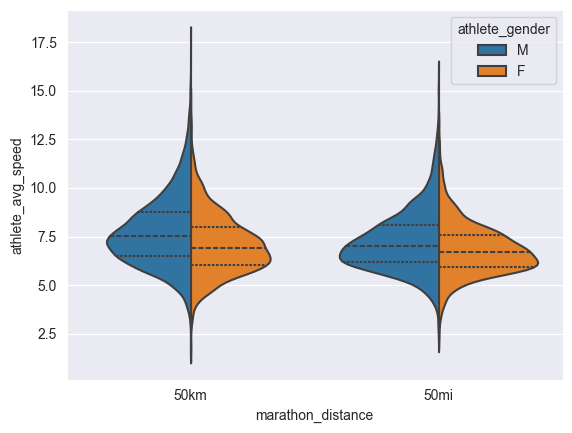

In [34]:
sns.violinplot(usa_2020_marathons_50, x='marathon_distance', y='athlete_avg_speed', hue='athlete_gender', split=True, inner='quart', linewidth=1.5)

# Relationship between age and average speed by athlete gender

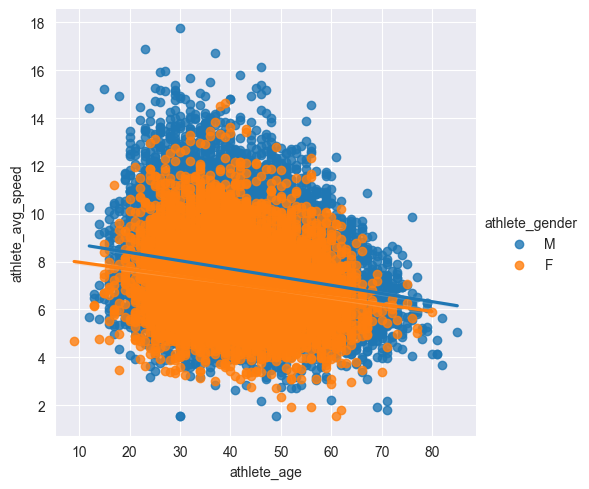

In [35]:
sns.lmplot(usa_2020_marathons_50, x='athlete_age', y='athlete_avg_speed', hue='athlete_gender')

# Difference in speed for the 50km and 50mi between male and female

In [36]:
usa_2020_marathons_50.groupby(['marathon_distance', 'athlete_gender'])['athlete_avg_speed'].agg(['mean'])

mean
marathon_distance athlete_gender          
50km              F               7.092015
                  M               7.743376
50mi              F               6.830764
                  M               7.249766

# What is the age of top-performing athletes in 50mi marathons

In [37]:
usa_2020_marathons_50.query('marathon_distance=="50mi"').groupby('athlete_age')['athlete_avg_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False).query('count>19').head(15)

,mean,count
athlete_age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


# What is the age of worst-performing athletes in 50mi marathons

In [38]:
usa_2020_marathons_50.query('marathon_distance=="50mi"').groupby('athlete_age')['athlete_avg_speed'].agg(['mean', 'count']).sort_values('mean', ascending=True).query('count>9').head(15)

,mean,count
athlete_age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.227206,34
62,6.267564,39
61,6.358355,31
63,6.514806,31


# Does the season affect athlete performance?

In [41]:
average_speed_per_month = subset.groupby('marathon_month')['athlete_avg_speed'].agg(['mean', 'count'])

In [43]:
median_speed_per_month = subset.groupby('marathon_month')['athlete_avg_speed'].agg(['median', 'count'])

In [44]:
average_speed_per_month

,mean,count
marathon_month,,
1,7.629795,4253
2,7.620775,4349
3,7.824223,3243
5,5.850947,206
6,6.758081,713
7,6.772204,931
8,6.903904,1295
9,7.162728,1979
10,7.374881,3942


In [45]:
median_speed_per_month

,median,count
marathon_month,,
1,7.3830,4253
2,7.3830,4349
3,7.4470,3243
5,5.6065,206
6,6.4530,713
7,6.4790,931
8,6.6630,1295
9,6.9910,1979
10,7.1660,3942


[]

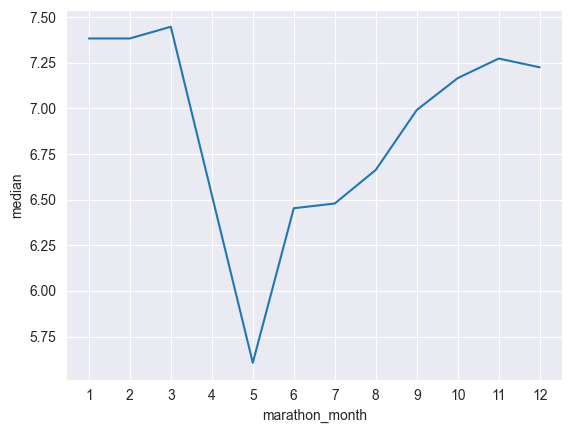

In [46]:
sns.set_style('darkgrid')
average_speed_chart = sns.lineplot(data=median_speed_per_month, x='marathon_month', y='median')
average_speed_chart.set_xticks(range(1,13))
average_speed_chart.set_xticklabels(range(1,13))
average_speed_chart.plot()